## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [4]:
df.shape

(1893, 8)

In [5]:
df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [6]:
df.rename({"Mouse ID": "Mouse_ID"}, axis=1, inplace=True)
df.rename({"Tumor Volume (mm3)": "avg_tumor_vol"}, axis=1, inplace=True)
df.head()

,Mouse_ID,Timepoint,avg_tumor_vol,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.
df.Mouse_ID.nunique()

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

df.groupby(["Mouse_ID", "Timepoint"]).size().sort_values().head(50)

Mouse_ID  Timepoint
a203      0            1
q633      5            1
          0            1
q610      35           1
          30           1
          25           1
          20           1
          15           1
          10           1
          5            1
          0            1
q597      45           1
          40           1
          35           1
          30           1
          25           1
          20           1
          15           1
          10           1
          5            1
          0            1
q582      35           1
          30           1
          25           1
          20           1
          15           1
q633      10           1
          15           1
          20           1
          25           1
r554      0            1
r157      15           1
          10           1
          5            1
          0            1
r107      30           1
          25           1
          20           1
          15           1
     

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = df.Mouse_ID == "g989"
df.loc[mask]

,Mouse_ID,Timepoint,avg_tumor_vol,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mask = df.Mouse_ID != "g989"
df_sub = df.loc[mask].reset_index(drop=True)

df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mouse_ID          1880 non-null   object 
 1   Timepoint         1880 non-null   int64  
 2   avg_tumor_vol     1880 non-null   float64
 3   Metastatic Sites  1880 non-null   int64  
 4   Drug Regimen      1880 non-null   object 
 5   Sex               1880 non-null   object 
 6   Age_months        1880 non-null   int64  
 7   Weight (g)        1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [11]:
# Checking the number of mice in the clean DataFrame (excludes g989).
df_sub.Mouse_ID.nunique()

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

avgs = df_sub.groupby("Drug Regimen")["avg_tumor_vol"].mean()
meds = df_sub.groupby("Drug Regimen")["avg_tumor_vol"].median()
varss = df_sub.groupby("Drug Regimen")["avg_tumor_vol"].var()
stds = df_sub.groupby("Drug Regimen")["avg_tumor_vol"].std()
sems = df_sub.groupby("Drug Regimen")["avg_tumor_vol"].sem()



In [13]:
summ1 = pd.concat([avgs, meds, varss, stds, sems], axis=1)
summ1.columns = ["Mean", "Median", "Var", "Std", "SEM"]
summ1

,Mean,Median,Var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summ2 = df_sub.groupby("Drug Regimen").agg({"avg_tumor_vol": ["mean", "median", "var", "std", "sem"]})
summ2

avg_tumor_vol                                          
                      mean     median        var       std       sem
Drug Regimen                                                        
Capomulin        40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin         52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol        52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril         55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol         54.331565  52.509285  66.173479  8.134708  0.596466
Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
Propriva         52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane         40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn         54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol        53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

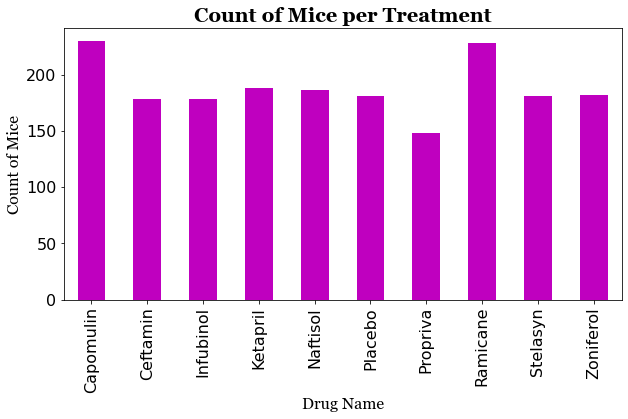

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


mouse_per_drug = df_sub.groupby(["Drug Regimen"]).count()["Mouse_ID"] 

mouse_per_drug.plot.bar(figsize=(10,5), color='m',fontsize = 16)
plt.xlabel("Drug Name", fontsize = 16, fontname = "Georgia")
plt.ylabel("Count of Mice", fontsize = 16, fontname = "Georgia")
plt.title("Count of Mice per Treatment", fontsize = 20, fontname = "Georgia", fontweight="bold")
plt.show()

In [16]:
summary = df_sub["Drug Regimen"].value_counts().reset_index()
summary.columns = ["Drug", "Count"]
summary

,Drug,Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,148


In [17]:
df_sub.groupby("Drug Regimen").size()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
dtype: int64

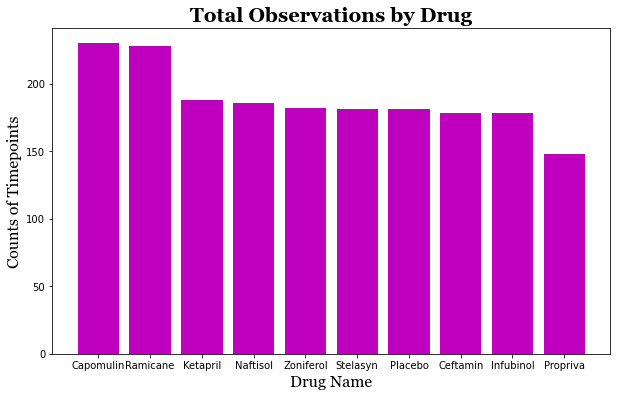

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.figure(figsize=(10,6))
plt.bar(summary.Drug, summary.Count,color="m")
plt.title("Total Observations by Drug", fontsize = 20, fontname = "Georgia", fontweight = "bold")
plt.ylabel("Counts of Timepoints", fontsize = 16, fontname = "Georgia")
plt.xlabel("Drug Name", fontsize = 16, fontname = "Georgia")
plt.show()

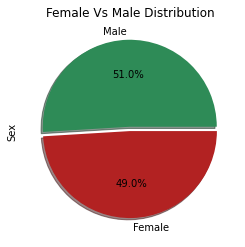

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_data = df_sub['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
colors = ['seagreen', 'firebrick']
explode = (0.05, 0)
sex_data.plot.pie(title='Female Vs Male Distribution', colors=colors, explode = explode, shadow = True, autopct="%1.1f%%")
plt.show()

In [20]:
summ3 = df_sub["Sex"].value_counts().reset_index()
summ3.columns = ["Gender", "Count"]
summ3

,Gender,Count
0,Male,958
1,Female,922


In [21]:
pies = summ3.Gender
pie_votes = summ3["Count"]
colors = ["seagreen","firebrick"]
explode = (0.1,0)

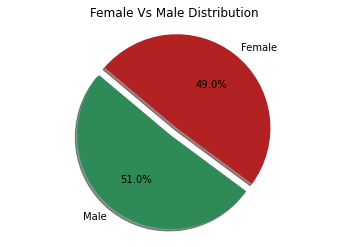

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Female Vs Male Distribution")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [24]:
df_sub.head()

,Mouse_ID,Timepoint,avg_tumor_vol,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [25]:
times = df_sub.groupby("Mouse_ID").Timepoint.max().reset_index()
times

,Mouse_ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [26]:
df_sub3 = pd.merge(df_sub, times, on=["Mouse_ID", "Timepoint"], how="inner")
df_sub3

,Mouse_ID,Timepoint,avg_tumor_vol,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

mask = df_sub3["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
df_sub4 = df_sub3.loc[mask].reset_index(drop=True)

df_sub4

,Mouse_ID,Timepoint,avg_tumor_vol,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17
96,i177,45,33.562402,3,Ramicane,Male,10,18
97,r944,45,41.581521,2,Capomulin,Male,12,25
98,u364,45,31.023923,3,Capomulin,Male,18,17


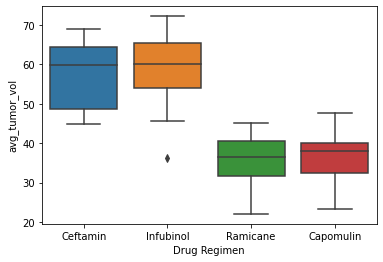

In [28]:
sns.boxplot(data=df_sub4, x="Drug Regimen", y="avg_tumor_vol")
plt.show()

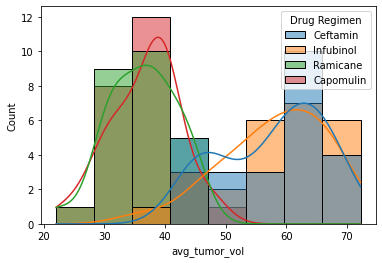

In [29]:
sns.histplot(data=df_sub4, hue="Drug Regimen", x="avg_tumor_vol", kde=True)
plt.show()

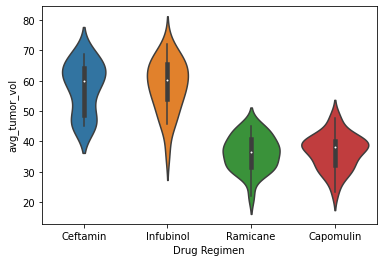

In [30]:
sns.violinplot(data=df_sub4, x="Drug Regimen", y="avg_tumor_vol")
plt.show()

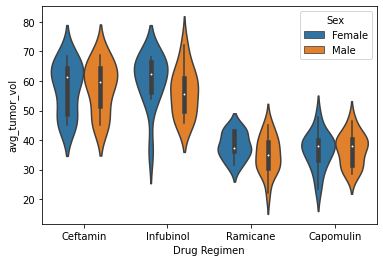

In [31]:
sns.violinplot(data=df_sub4, x="Drug Regimen", y="avg_tumor_vol", hue="Sex")
plt.show()

In [32]:
df_sub4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mouse_ID          100 non-null    object 
 1   Timepoint         100 non-null    int64  
 2   avg_tumor_vol     100 non-null    float64
 3   Metastatic Sites  100 non-null    int64  
 4   Drug Regimen      100 non-null    object 
 5   Sex               100 non-null    object 
 6   Age_months        100 non-null    int64  
 7   Weight (g)        100 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 6.4+ KB


In [33]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

data = []

for drug in drugs:
    sub = df_sub4.loc[df_sub4["Drug Regimen"] == drug, "avg_tumor_vol"]
    
    lower_q = sub.quantile(0.25)
    upper_q = sub.quantile(0.75)
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - 1.5*iqr
    upper_bound = upper_q + 1.5*iqr
    
    mask = (df_sub4["Drug Regimen"] == drug) & ((df_sub4["avg_tumor_vol"] > upper_bound) | (df_sub4["avg_tumor_vol"] < lower_bound))
    outliers = df_sub4.loc[mask]
    print(outliers)
    
    data.append(sub)

Empty DataFrame
Columns: [Mouse_ID, Timepoint, avg_tumor_vol, Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Empty DataFrame
Columns: [Mouse_ID, Timepoint, avg_tumor_vol, Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
  Mouse_ID  Timepoint  avg_tumor_vol  Metastatic Sites Drug Regimen     Sex  \
4     c326          5      36.321346                 0    Infubinol  Female   

   Age_months  Weight (g)  
4          18          25  
Empty DataFrame
Columns: [Mouse_ID, Timepoint, avg_tumor_vol, Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


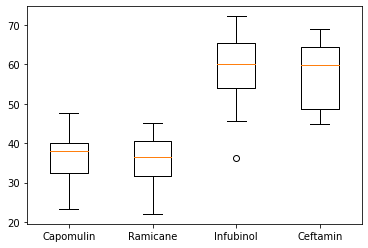

In [34]:
plt.boxplot(data, labels=drugs)
plt.show()

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

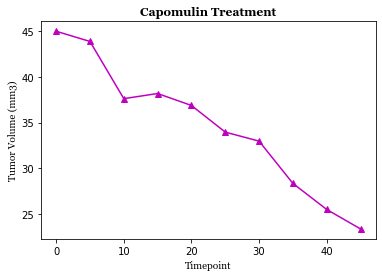

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Identify data points of a mouse treated with Capomulin
cap_mouse = df_sub.loc[df_sub['Mouse_ID'] == 's185']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(cap_mouse['Timepoint'], cap_mouse['avg_tumor_vol'], marker = '^', color="m")

# Add labels and title to plot
plt.xlabel("Timepoint", fontname = "Georgia")
plt.ylabel("Tumor Volume (mm3)", fontname = "Georgia")
plt.title("Capomulin Treatment", fontweight="bold", fontname = "Georgia")

# Display plot
plt.show()

In [37]:
df_sub.loc[df_sub["Drug Regimen"] == "Capomulin"].head()

,Mouse_ID,Timepoint,avg_tumor_vol,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
224,j246,0,45.0,0,Capomulin,Female,21,21
225,r554,0,45.0,0,Capomulin,Female,8,17
226,s185,0,45.0,0,Capomulin,Female,3,17
227,b742,0,45.0,0,Capomulin,Male,7,21


In [38]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mask = df_sub["Drug Regimen"] == "Capomulin"

data = df_sub.loc[mask].groupby("Mouse_ID")[["avg_tumor_vol", "Weight (g)"]].mean().reset_index()
data

,Mouse_ID,avg_tumor_vol,Weight (g)
0,b128,41.963636,22
1,b742,40.083699,21
2,f966,36.505973,17
3,g288,41.990097,19
4,g316,44.613344,22
5,i557,44.805810,24
6,i738,39.141053,20
7,j119,44.465236,23
8,j246,43.216925,21
9,l509,44.434474,21


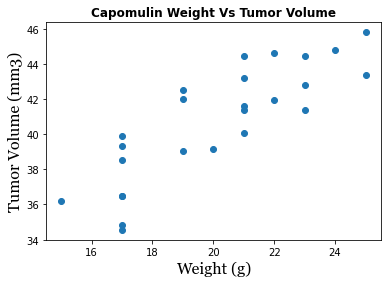

In [39]:
plt.scatter(data["Weight (g)"], data["avg_tumor_vol"])

plt.title("Capomulin Weight Vs Tumor Volume", fontweight="bold")
plt.xlabel("Weight (g)", fontsize = 16, fontname = "Georgia")
plt.ylabel("Tumor Volume (mm3)", fontsize = 16, fontname = "Georgia")
plt.show()

## Correlation and Regression

Correlation coefficient: 0.84.


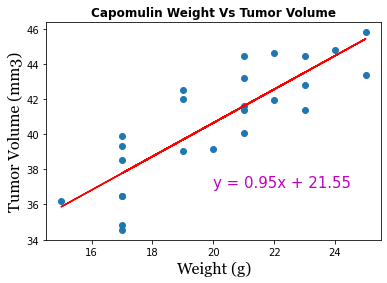

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# plt.scatter(data["Weight (g)"], data["avg_tumor_vol"])
# plt.title("Capomulin Weight Vs Tumor Volume", fontweight="bold")
# plt.xlabel("Weight (g)", fontsize = 16, fontname = "Georgia")
# plt.ylabel("Tumor Volume (mm3)", fontsize = 16, fontname = "Georgia")
# plt.show()

x = data["Weight (g)"]
y = data["avg_tumor_vol"]

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""Correlation coefficient: {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="m")

# Add labels and title to plot
plt.title("Capomulin Weight Vs Tumor Volume", fontweight="bold")
plt.xlabel("Weight (g)", fontsize = 16, fontname = "Georgia")
plt.ylabel("Tumor Volume (mm3)", fontsize = 16, fontname = "Georgia")
plt.show()